mu: -0.6464077484479651- sigma: 2.1216805810010233
r-mu: 0.31419483355845923- r-sigma: 0.39537053979191394
mu: 0.9536655871735049- sigma: 2.0159319006458105
r-mu: 1.166441333884728- r-sigma: 1.261952621684567
1.4806361674431872 1.657323161476481
0.12504635354711802


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


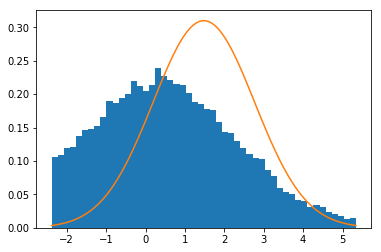

In [426]:
import numpy as np
from math import erf, exp, pi
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm



n= 80
m = 30000
n_bins = 50


mus = np.random.uniform(-1, 1, n)
sigmas = np.random.uniform(0, 4, n)


def erfc(v):
    return 1.0 - erf(v)

def rect_mean(m, v):
    s = v**0.5
    r1 = s*exp(-(m**2)/(2*v))/(2*pi)**0.5
    r2 = 0.5*m*(1+erf(m/((2*v)**0.5)))
    return r1 + r2

def rect_var(m, v):
    s = v**0.5
    r1 = -v*exp(-(m**2)/v)/(2*pi)
    r2 = (-m*s*erf(m/(2*v)**0.5)*exp(-(m**2)/(2*v)))/(2*pi)**0.5
    r3 = -0.25*(-2+erfc(m/(2*v)**0.5))*(2*v + m**2 *erfc(m/(2*v)**0.5))
    return r1+r2+r3
    
    

samples = []
for i in range(n):
    print ("mu: " + str(mus[i]) + "- sigma: " + str(sigmas[i]))
    print ("r-mu: " + str(rect_mean(mus[i], sigmas[i])) + "- r-sigma: " + str(rect_var(mus[i], sigmas[i])))
    samples.append(np.random.normal(mus[i], np.sqrt(sigmas[i]), m))
samples = np.array(samples)

weights = np.random.random(samples.shape)

z = np.sum(np.maximum(0, samples), 0)
#z = np.extract(z > 0, z)
zi = np.sum(samples, 0)


#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

#mu, sigma=norm.fit(np.extract(z > 0, z))
mu = np.sum([rect_mean(m,v) for m,v in zip(mus, sigmas)])
sigma2 = np.sum([rect_var(m,v) for m,v in zip(mus, sigmas)])
sigma = np.sqrt(sigma2)

print (mu, sigma2)

#mu = np.sum(mus)
#variance = np.sum(sigmas)
#sigma = math.sqrt(variance)
phi = norm.cdf(0, loc=mu, scale=sigma)
print (phi)

# We can set the number of bins with the `bins` kwarg
plt.hist(z, bins=n_bins, range= (mu - 3*sigma, mu + 3*sigma), density=True)
#_ = axs[1].hist(zi, bins=n_bins, range= (mu - 3*sigma, mu + 3*sigma), density=True)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, mlab.normpdf(x, mu, sigma))
#axs[1].plot(x,mlab.normpdf(x, mu, sigma))


    

In [ ]:
import numpy as np
from math import erf, exp, pi
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

# Test variable dependence

n= 10
n2=4
m = 3000
n_bins = 50


mus = np.random.uniform(-1, 1, n)
sigmas = np.random.uniform(0, 4, n)
weights = np.random.uniform(-1, 1, (n, n2))


samples = []
for i in range(n):
    samples.append(np.random.normal(mus[i], np.sqrt(sigmas[i]), m))
samples = np.array(samples)

# Recompute empirical mean and variance
#mus = np.mean(samples, 1)
sigmas = np.cov(samples)
sigmas = np.atleast_2d(sigmas)
print(sigmas.shape)

samples = np.dot(samples.T, weights).T
print (samples.shape)

# Propagate mean and (co)variance 
mus = np.dot(mus[np.newaxis, ...], weights)
sigmas = weights.T @ sigmas @ weights


zi = np.sum(samples, 0)


#mu, sigma=norm.fit(np.extract(z > 0, z))
mu = np.sum(mus)
sigma2 = np.sum(sigmas)
sigma = np.sqrt(sigma2)

print (mu, sigma2)

#mu = np.sum(mus)
#variance = np.sum(sigmas)
#sigma = math.sqrt(variance)
phi = norm.cdf(0, loc=mu, scale=sigma)
print (phi)

# We can set the number of bins with the `bins` kwarg
plt.hist(zi, bins=n_bins, range= (mu - 3*sigma, mu + 3*sigma), density=True)
#_ = axs[1].hist(zi, bins=n_bins, range= (mu - 3*sigma, mu + 3*sigma), density=True)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, mlab.normpdf(x, mu, sigma))
#axs[1].plot(x,mlab.normpdf(x, mu, sigma))


    

[ 0.9180045  -0.3022642   0.5194445   0.23849518]
0.3434199975955329
[2.88653975 0.05944024 0.04881786 0.21008516]
(5000, 4)
(5000,)
1.4445830014972607
1.1925430218317294
Estimated mean:
1.460994817972407
Estimated var
1.213610804921161


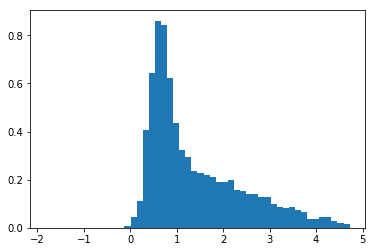

In [425]:
import scipy.integrate as integrate
n_variables = 4 #2*2 max-pooling
m = 5000


mus = np.random.uniform(-1, 1, n_variables)
sigmas = np.random.uniform(0, 4, n_variables)

print (mus)
print (mus.mean())
print (sigmas)

# Generate m samples for each of the n_variables random variables
x = [];
for i in range(n_variables):
     x.append(np.random.normal(mus[i], np.sqrt(sigmas[i]), m))
x = np.array(x).T
print (x.shape)

# Rectify
x = np.maximum(0, x)

z = np.max(x, 1)
print (z.shape)
print (np.mean(z))
print (np.var(z))
plt.hist(z, bins=n_bins, range= (np.mean(z) - 3*np.std(z), np.mean(z) + 3*np.std(z)), density=True)

# Estimate mean

def cdf_rect(x, loc, sigma):
    return 0 if x<0 else norm.cdf(x, loc, sigma)

print ("Estimated mean:")
mean_z = integrate.quad(lambda x: 1.0- np.prod([cdf_rect(x, mus[i], np.sqrt(sigmas[i])) for i in range(n_variables)]) , 0, np.inf)
mean_z2   = integrate.quad(lambda x: 2*x*(1.0- np.prod([cdf_rect(x, mus[i], np.sqrt(sigmas[i])) for i in range(n_variables)])) , 0, np.inf)
print (mean_z[0])
print ("Estimated var")
print (mean_z2[0] - mean_z[0]**2)